In [75]:
import numpy as np
import pandas as pd
import pickle
from seaborn import heatmap
from matplotlib import rcParams
import matplotlib.pyplot as pl

In [50]:
% matplotlib inline
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['axes.formatter.limits'] = -2, 3
rcParams['font.size'] = 14

In [8]:
with open('../PklJar/CapeCodDataDict', 'rb') as f:
    dataDict = pickle.load(f)
    wind = dataDict['Features']['WIND']
    strandings = dataDict['Targets']['TOTAL']

In [5]:
wind.head()

,EasterlyWS,SoutherlyWS
1999-01-01,-8.369086,-1.962736
1999-01-02,-10.358338,2.124278
1999-01-03,5.530758,-3.071964
1999-01-04,-6.726604,-2.535160
1999-01-05,-8.472319,-0.380683


In [59]:
wind_shifted = pd.concat([wind, wind.shift(1), wind.shift(2), wind.shift(3),
                         wind.shift(7), wind.shift(30)], axis=1)
col_names_orig = wind.columns.tolist()
sfxs = ['', '_1d', '_2d' ,'_3d' ,'_7d', '_30d']

In [60]:
col_names = ['%s%s' %(col_name, sfx) for sfx in sfxs for col_name in col_names_orig]

In [61]:
wind_shifted.columns = col_names

In [62]:
wind_shifted.head()

,EasterlyWS,SoutherlyWS,EasterlyWS_1d,SoutherlyWS_1d,EasterlyWS_2d,SoutherlyWS_2d,EasterlyWS_3d,SoutherlyWS_3d,EasterlyWS_7d,SoutherlyWS_7d,EasterlyWS_30d,SoutherlyWS_30d
1999-01-01,-8.369086,-1.962736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-02,-10.358338,2.124278,-8.369086,-1.962736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-03,5.530758,-3.071964,-10.358338,2.124278,-8.369086,-1.962736,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,-6.726604,-2.535160,5.530758,-3.071964,-10.358338,2.124278,-8.369086,-1.962736,NaN,NaN,NaN,NaN
1999-01-05,-8.472319,-0.380683,-6.726604,-2.535160,5.530758,-3.071964,-10.358338,2.124278,NaN,NaN,NaN,NaN


In [63]:
dataDict['Features']['SHIFTED_WIND'] = wind_shifted

In [64]:
targets = strandings.loc['1999-03-07':]

In [65]:
targets.head()

1999-03-07    6.0
1999-03-08    0.0
1999-03-09    0.0
1999-03-10    0.0
1999-03-11    0.0
Freq: D, dtype: float64

In [66]:
shwind = wind_shifted.loc['1999-03-07':]

In [67]:
test = pd.concat([targets, shwind], axis=1)

In [68]:
test.head()

,0,EasterlyWS,SoutherlyWS,EasterlyWS_1d,SoutherlyWS_1d,EasterlyWS_2d,SoutherlyWS_2d,EasterlyWS_3d,SoutherlyWS_3d,EasterlyWS_7d,SoutherlyWS_7d,EasterlyWS_30d,SoutherlyWS_30d
1999-03-07,6.0,-1.597614,11.183859,3.570062,2.563992,-9.224087,-0.046570,3.179750,-9.103259,2.036880,-1.265833,-5.350695,5.959278
1999-03-08,0.0,-10.374381,7.568804,-1.597614,11.183859,3.570062,2.563992,-9.224087,-0.046570,2.733924,-6.260351,-4.862086,1.981418
1999-03-09,0.0,-8.124423,5.416860,-10.374381,7.568804,-1.597614,11.183859,3.570062,2.563992,-4.567401,-4.513101,-7.616287,2.540035
1999-03-10,0.0,-4.053519,2.885376,-8.124423,5.416860,-10.374381,7.568804,-1.597614,11.183859,-1.074112,-1.885289,-0.946676,4.569450
1999-03-11,0.0,-7.269797,4.485525,-4.053519,2.885376,-8.124423,5.416860,-10.374381,7.568804,3.179750,-9.103259,-2.245282,-2.983975


In [44]:
test.rename(columns={0: 'Total'}, inplace=True)

In [45]:
test.head()

,Total,EasterlyWS,SoutherlyWS,EasterlyWS_1d,SoutherlyWS_1d,EasterlyWS_2d,SoutherlyWS_2d,EasterlyWS_3d,SoutherlyWS_3d,EasterlyWS_7d,SoutherlyWS_7d,EasterlyWS_30d,SoutherlyWS_30d
1999-03-07,6.0,-1.597614,11.183859,3.570062,2.563992,-9.224087,-0.046570,3.179750,-9.103259,2.036880,-1.265833,-5.350695,5.959278
1999-03-08,0.0,-10.374381,7.568804,-1.597614,11.183859,3.570062,2.563992,-9.224087,-0.046570,2.733924,-6.260351,-4.862086,1.981418
1999-03-09,0.0,-8.124423,5.416860,-10.374381,7.568804,-1.597614,11.183859,3.570062,2.563992,-4.567401,-4.513101,-7.616287,2.540035
1999-03-10,0.0,-4.053519,2.885376,-8.124423,5.416860,-10.374381,7.568804,-1.597614,11.183859,-1.074112,-1.885289,-0.946676,4.569450
1999-03-11,0.0,-7.269797,4.485525,-4.053519,2.885376,-8.124423,5.416860,-10.374381,7.568804,3.179750,-9.103259,-2.245282,-2.983975


In [46]:
corrtest = test.corr()

In [47]:
corrtest

,Total,EasterlyWS,SoutherlyWS,EasterlyWS_1d,SoutherlyWS_1d,EasterlyWS_2d,SoutherlyWS_2d,EasterlyWS_3d,SoutherlyWS_3d,EasterlyWS_7d,SoutherlyWS_7d,EasterlyWS_30d,SoutherlyWS_30d
Total,1.000000,-0.019634,0.000982,0.005276,-0.002639,-0.016609,0.004199,-0.030812,0.013314,-0.039363,-0.004827,-0.000327,0.007636
EasterlyWS,-0.019634,1.000000,-0.030212,0.451187,0.039759,0.166285,0.006753,0.163475,-0.028609,0.159313,-0.069278,0.109522,-0.041576
SoutherlyWS,0.000982,-0.030212,1.000000,-0.005236,0.397053,-0.025493,0.084696,-0.073284,0.059452,-0.078044,0.057038,-0.098476,0.062449
EasterlyWS_1d,0.005276,0.451187,-0.005236,1.000000,-0.029976,0.450425,0.040098,0.166314,0.006294,0.183489,-0.089739,0.084476,-0.031458
SoutherlyWS_1d,-0.002639,0.039759,0.397053,-0.029976,1.000000,-0.005393,0.396995,-0.025264,0.084322,-0.080105,0.062917,-0.067974,0.086282
EasterlyWS_2d,-0.016609,0.166285,-0.025493,0.450425,-0.005393,1.000000,-0.029721,0.449709,0.041058,0.147240,-0.087999,0.077022,-0.037457
SoutherlyWS_2d,0.004199,0.006753,0.084696,0.040098,0.396995,-0.029721,1.000000,-0.005048,0.396740,-0.058553,0.063165,-0.067720,0.053877
EasterlyWS_3d,-0.030812,0.163475,-0.073284,0.166314,-0.025264,0.449709,-0.005048,1.000000,-0.030108,0.148807,-0.064869,0.105566,-0.055881
SoutherlyWS_3d,0.013314,-0.028609,0.059452,0.006294,0.084322,0.041058,0.396740,-0.030108,1.000000,-0.070313,0.048222,-0.067324,0.057280
EasterlyWS_7d,-0.039363,0.159313,-0.078044,0.183489,-0.080105,0.147240,-0.058553,0.148807,-0.070313,1.000000,-0.030693,0.109671,-0.069141


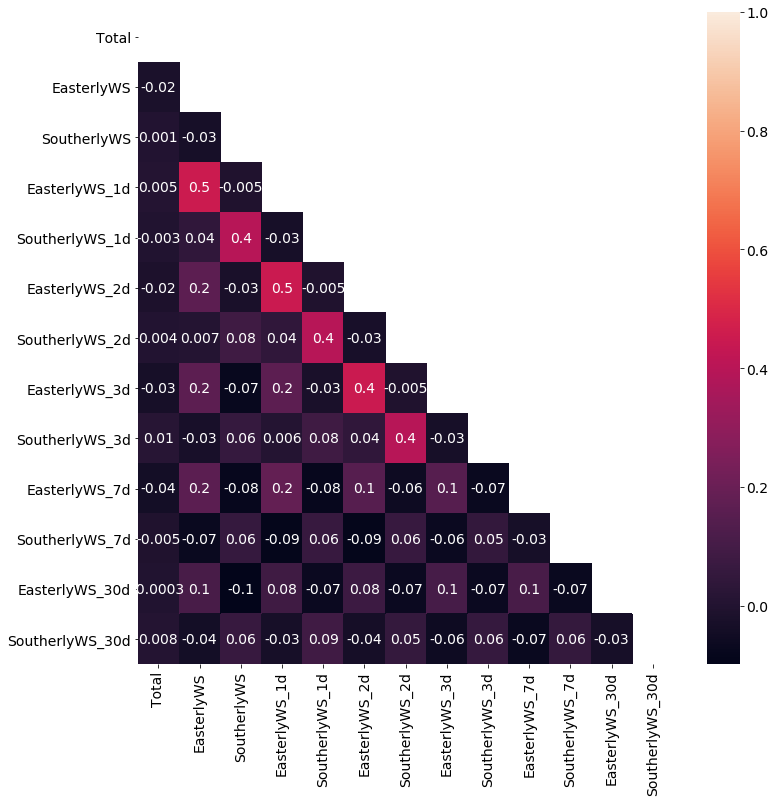

In [71]:
_, ax = pl.subplots(figsize=(12, 12))
heatmap(corrtest, mask=np.triu(np.ones(corrtest.shape[0])), annot=True, fmt='.1g');

In [72]:
with open('../PklJar/CapeCodDataDict', 'wb') as f:
    pickle.dump(dataDict, f)

In [74]:
dataDict['Features'].keys()

dict_keys(['CENSUS', 'MAG', 'SUN', 'TIDE', 'WIND', 'WATER', 'SHIFTED_WIND'])